# Basic Hand Gestures Classification Based on Surface Electromyography (SEMG)

Utilizaremos o método CRISP-DM para realizar a tarefa de classificação dos dados a seguir:

https://archive.ics.uci.edu/ml/datasets/sEMG+for+Basic+Hand+movements




## O que é CRISP-DM?

O *Cross Industry Standard Process for Data Mining* (CRISP-DM) é um modelo de processo com seis fases que descreve naturalmente o ciclo de vida da ciência dos dados. É como um conjunto de guias para ajudar a planear, organizar, e implementar o seu projeto de ciência de dados (ou aprendizagem de máquina). Os 6 guias são:

    Compreensão do negócio - O que é que o negócio precisa?
    Compreensão de dados - Que dados temos / precisamos? Está limpo?
    Preparação dos dados - Como organizamos os dados para a modelagem?
    Modelação - Que técnicas de modelação devemos aplicar?
    Avaliação - Qual o modelo que melhor satisfaz os objectivos do negócio?
    Implantação - Como é que as partes interessadas acedem aos resultados?


## Compreensão do negócio e compreensão dos dados

O *dataset* inclui 2 bases de dados de sinais eletromiográficos de superfície de 6 movimentos da mão utilizando o Sistema EMG da Delsys. Os sujeitos saudáveis realizaram seis movimentos diários de apreensão. A eletromiografia de superfície (sEMG) é um método não invasivo de medição da atividade bioelétrica dos músculos, ele é utilizado tanto no diagnóstico de doenças do sistema muscular como no desenvolvimento de interfaces homem-máquina. 

Os participantes realizaram repetidamente os seis movimentos seguintes:

> a) Esférico: para segurar ferramentas esféricas;

> b) Ponta: para segurar pequenas ferramentas;

> c) Palmar: para agarrar com a palma da mão virada para o objeto;

> d) Lateral: para segurar objetos finos e planos;

> e) Cilíndrico: para segurar ferramentas cilíndricas;

> f) Gancho: para suportar uma carga pesada.



Estão incluídas duas bases de dados diferentes:

* 5 indivíduos saudáveis (dois homens e três mulheres) da mesma idade aproximadamente (20 a 22 anos) conduziram os 6 movimentos 30 vezes cada um. O tempo medido é de 6 segundos. Há um arquivo para cada participante na base de dados.
* 1 sujeito saudável (masculino, 22 anos de idade) conduziu os 6 movimentos 100 vezes cada um, totalizando um total de 600 movimentos, durante 3 dias consecutivos. O tempo medido é de 5 segundos. Há um arquivo apenas para ele. 

O problema apresentado no conjunto é um problema de classificação, onde é necessário identificar a classe (o gesto que está sendo feito) de cada linha. É interessante notar que utilizar o segundo dataset poderá resultar em uma acurácia maior do que o primeiro, pois é possível que um indivíduo possua algum vício na sua execução de algum gesto, assim realizando um mesmo gesto de uma forma muito semelhante todas as vezes que houver repetição dele. Como consequência, devido a uma forte correlação entre os sinais sEMG, uma precisão de classificação excepcional pode ser alcançada, mas um sobreajustamento significativo do classificador pode desfocar as conclusões.

Entretanto o primeiro conjunto de dados também possui uma desvantagem, ele carece no número de repetições de gestos, há apenas 30 repetições de cada gesto, as repetições são vitais para o desenvolvimento de algoritmos robustos de reconhecimento. Também é desaconselhado que se realize o mesmo gesto várias vezes seguidas, pois é provável que o sujeito realize o gesto de uma forma muito semelhante, o que também pode ter como consequência uma precisão de classificação muito alta. Abordagens que reduzem o risco de um sujeito executar cada gesto de forma idêntica são executar sequencialmente uma ordem de gestos ou fazer eles em ordem aleatória, no entanto ainda é vital incluir um grande número de repetições para diminuir o risco. No entan


## Compreensão dos dados e preparação dos dados

### Importação de bibliotecas

In [117]:
import numpy as np
from scipy.io import loadmat  
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from google.colab import drive
import missingno as msno
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importando e formatando os dados

Nessa seção iremos importar e formatar os dados, o repositório do UCI os disponibiliza em formato .mat, portanto devemos transformar esses dados para que possam ser utilizados com a biblioteca pandas do python

In [2]:
matfile = '/content/gdrive/My Drive/data/female_1.mat'
#matfile = 'data/female_1.mat'
mat = loadmat(matfile)
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 18 12:16:25 2014', '__version__': '1.0', '__globals__': [], 'cyl_ch1': array([[ 0.072198,  0.276211,  0.429221, ..., -2.528968,  0.0977  ,
         0.837247],
       [ 0.25071 ,  0.301713,  0.199706, ..., -0.616346,  0.454723,
         0.021195],
       [ 0.123201,  0.148703,  0.148703, ..., -0.36133 ,  0.505726,
         0.607732],
       ...,
       [ 0.531228,  0.072198, -0.20832 , ...,  2.571358,  0.301713,
         0.123201],
       [-0.947867,  1.117765,  1.959319, ...,  0.225208,  0.735241,
         1.321778],
       [ 0.148703,  0.148703,  0.454723, ...,  1.015759,  0.735241,
        -0.106313]]), 'cyl_ch2': array([[ 0.202185,  0.278708,  0.100154, ...,  0.584801,  0.508278,
        -0.256954],
       [ 0.227693,  0.125662,  0.049139, ...,  0.125662, -0.588555,
        -0.052892],
       [ 0.227693,  0.125662,  0.023631, ...,  0.074646,  0.100154,
         0.023631],
       ...,
       [ 0.227693,  0.2

Aqui podemos observar que cada classe (isto é cada movimento da mão) possui 2 caracteristicas, a ch1 e a ch2. Portanto temos 2 colunas de características e 1 coluna que possui a classe do dado neste dataset. No entanto iremos adicionar mais uma coluna, esta referente ao gênero do participante sendo 0 feminino e 1 masculino, pois é uma informação que temos pelos dados, poderemos retirá-la mais tarde caso não seja útil.

In [3]:

def load_mat_file(matfile):
  mat = loadmat(matfile)  # load mat-file
  
  df_final = pd.DataFrame()
  df_list = []
  for key, value in mat.items():

    df = pd.DataFrame()
    if key not in ["__globals__", "__header__", "__version__"]:
      k = str(key)
      k = k.split("_")
      df[k[1]] = value[0]
      df["hand_mov"] = k[0]
      df_list.append(df)
  
  i = 0
  while i < len(df_list):
    df_temp = pd.concat([df_list[i], df_list[i + 1]], axis=1)
    df_final = pd.concat([df_final, df_temp])
    i = i + 2

  df_final = df_final.loc[:,~df_final.columns.duplicated()]
  df_final = df_final[['ch1', 'ch2', 'hand_mov']]
  return df_final

matfile = '/content/gdrive/My Drive/data/female_1.mat'
#matfile = 'data/female_1.mat'
df = load_mat_file(matfile)
df['gender'] = 0.0 # 0 sendo mulher, 1 sendo homem
df = df[['ch1', 'ch2', 'gender','hand_mov']]
df.head()

,ch1,ch2,gender,hand_mov
0,0.072198,0.202185,0.0,cyl
1,0.276211,0.278708,0.0,cyl
2,0.429221,0.100154,0.0,cyl
3,0.327214,0.100154,0.0,cyl
4,0.123201,0.151170,0.0,cyl


### Juntando todos os dados dos 5 participantes

In [4]:

matfile = '/content/gdrive/My Drive/data/female_2.mat'
#matfile = 'data/female_2.mat'
df1 = load_mat_file(matfile)
df1['gender'] = 0.0 # 0 sendo mulher, 1 sendo homem
df1 = df1[['ch1', 'ch2', 'gender','hand_mov']]

matfile = '/content/gdrive/My Drive/data/female_3.mat'
#matfile = 'data/female_3.mat'
df2 = load_mat_file(matfile)
df2['gender'] = 0.0 # 0 sendo mulher, 1 sendo homem
df2 = df2[['ch1', 'ch2', 'gender','hand_mov']]

matfile = '/content/gdrive/My Drive/data/male_1.mat'
#matfile = 'data/male_1.mat'
df3 = load_mat_file(matfile)
df3['gender'] = 1.0 # 0 sendo mulher, 1 sendo homem
df3 = df3[['ch1', 'ch2', 'gender','hand_mov']]

matfile = '/content/gdrive/My Drive/data/male_2.mat'
#matfile = 'data/male_2.mat'

df4 = load_mat_file(matfile)
df4['gender'] = 1.0 # 0 sendo mulher, 1 sendo homem
df4 = df4[['ch1', 'ch2', 'gender','hand_mov']]



df_all = pd.concat([df, df1, df2, df3, df4])


df_all.head()

,ch1,ch2,gender,hand_mov
0,0.072198,0.202185,0.0,cyl
1,0.276211,0.278708,0.0,cyl
2,0.429221,0.100154,0.0,cyl
3,0.327214,0.100154,0.0,cyl
4,0.123201,0.151170,0.0,cyl


## Analise de estatística descritiva dos dados

In [5]:
df_all.shape

(90000, 4)

In [6]:
df_all.describe() 

,ch1,ch2,gender
count,90000.000000,90000.000000,90000.000000
mean,0.142110,0.143121,0.400000
std,0.544454,0.546097,0.489901
min,-12.525609,-10.051929,0.000000
25%,-0.004307,-0.027385,0.000000
50%,0.148703,0.151170,0.000000
75%,0.301713,0.329724,1.000000
max,7.646183,6.808691,1.000000


In [7]:
df_all.dtypes

ch1         float64
ch2         float64
gender      float64
hand_mov     object
dtype: object

### Dados Nulos

Sempre é importante verificar se existem dados nulos em um conjunto de dados, para que seja feito seu tratamento ou sua retirada, caso seja necessário.

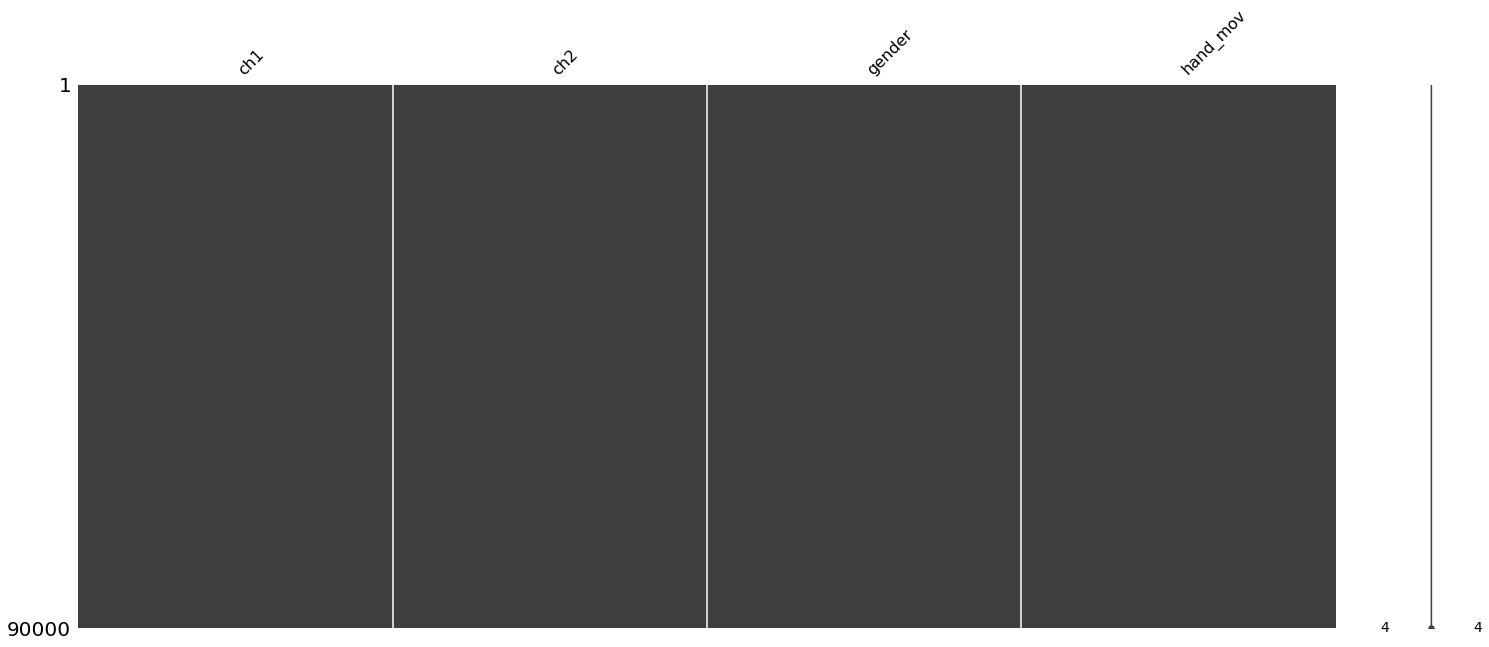

In [8]:
msno.matrix(df_all)

No entanto aqui observamos que não há dados nulos nesse conjunto.

### Distribuição das classes

In [9]:
# Distribuição das classes
df_all[['hand_mov']].groupby('hand_mov')['hand_mov'].count() # Contando a quantidade de classes e suas respectivas quantidades

hand_mov
cyl      15000
hook     15000
lat      15000
palm     15000
spher    15000
tip      15000
Name: hand_mov, dtype: int64

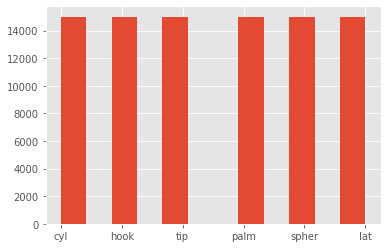

In [10]:
plt.style.use('ggplot')
plt.hist(df_all["hand_mov"],bins=12)
plt.gca()

Temos 6 classes nesse dataset, sendo elas nomeadas como: cyl, hook, tip, palm, spher e lat. Podemos observar que as classes são perfeitamente balanceadas, portanto não há necessidade de qualquer técnica de subsampling ou resampling.

### Matriz de correlação

A correlação é uma estatística muito comum e muito utilizada para analisar se há ligações entre variáveis ou se algum parâmetro pode ser um bom preditor para outro, portanto, tendo em mente que não se pode concluir que correlação implica em causualidade, é interessante plotar a matriz de correlação das variáveis do dataset.

In [11]:
corr = df_all.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(9)

,ch1,ch2,gender
ch1,1.000000000,-0.008053107,0.000156799
ch2,-0.008053107,1.000000000,-0.000941851
gender,0.000156799,-0.000941851,1.000000000


Não há correlação relevante entre as variáveis contínuas e a variável categórica de 2 valores que temos no nosso dataset. Não é possível calcular a correlação quando temos uma variável categórica com mais de 2 classes, no entanto podemos realizar um procedimento chamado one-hot-encoding e avaliar a correlação entre as variáveis contínuas e as variáveis criadas com a transformação da categórica. 

Isto é, iremos avaliar se ch1 e ch2 tem correlação com o fato de uma linha ser classificada como cyl ou não, ou se possuem correlação com a classificação de hook ou não, por exemplo.

In [12]:
df_all_ohe = pd.get_dummies(df_all, prefix='hand_mov')
print(df_all_ohe.head())

        ch1       ch2  gender  ...  hand_mov_palm  hand_mov_spher  hand_mov_tip
0  0.072198  0.202185     0.0  ...              0               0             0
1  0.276211  0.278708     0.0  ...              0               0             0
2  0.429221  0.100154     0.0  ...              0               0             0
3  0.327214  0.100154     0.0  ...              0               0             0
4  0.123201  0.151170     0.0  ...              0               0             0

[5 rows x 9 columns]


One-hot Encoding é um tipo de representação vetorial em que todos os elementos de um vetor são 0, exceto um, que tem como valor 1, onde 1 representa um booleano especificando uma categoria do elemento. Por exemplo no conjunto de dados a coluna hand_mov_palm só tera 1 onde a classe for palm. Ele representa a existência ou não dessa classificação, essa é uma maneira de representar variáveis categóricas como números sem denotar uma ordem de importância entre elas.

In [13]:
corr = df_all_ohe.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(9)

,ch1,ch2,gender,hand_mov_cyl,hand_mov_hook,hand_mov_lat,hand_mov_palm,hand_mov_spher,hand_mov_tip
ch1,1.000000000,-0.008053107,0.000156799,0.000184567,0.001440010,0.000616065,0.000479220,-0.001559620,-0.001160242
ch2,-0.008053107,1.000000000,-0.000941851,0.000600221,-0.000752222,0.000358747,0.000904542,-0.000960134,-0.000151155
gender,0.000156799,-0.000941851,1.000000000,0.000000000,0.000000000,0.000000000,-0.000000000,0.000000000,-0.000000000
hand_mov_cyl,0.000184567,0.000600221,0.000000000,1.000000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000
hand_mov_hook,0.001440010,-0.000752222,0.000000000,-0.200000000,1.000000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000
hand_mov_lat,0.000616065,0.000358747,0.000000000,-0.200000000,-0.200000000,1.000000000,-0.200000000,-0.200000000,-0.200000000
hand_mov_palm,0.000479220,0.000904542,-0.000000000,-0.200000000,-0.200000000,-0.200000000,1.000000000,-0.200000000,-0.200000000
hand_mov_spher,-0.001559620,-0.000960134,0.000000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000,1.000000000,-0.200000000
hand_mov_tip,-0.001160242,-0.000151155,-0.000000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000,1.000000000


Podemos concluir nossa observação, não há correlação relevante entre os preditores e as classes.

### Visualização dos dados

<Figure size 576x576 with 0 Axes>

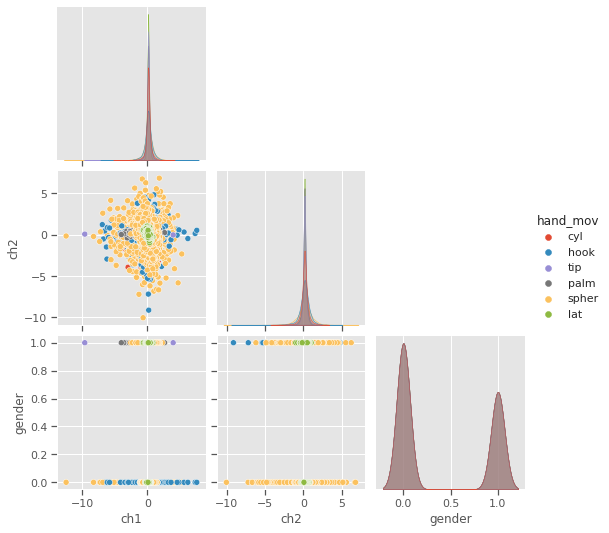

In [14]:
variaveis_pertinentes = df_all
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
# Plotando a distribuição em pares das variáveis 
plt.figure(figsize=(8,8))
sns.pairplot(variaveis_pertinentes, hue="hand_mov", corner=True, diag_kind="kde")
plt.show()

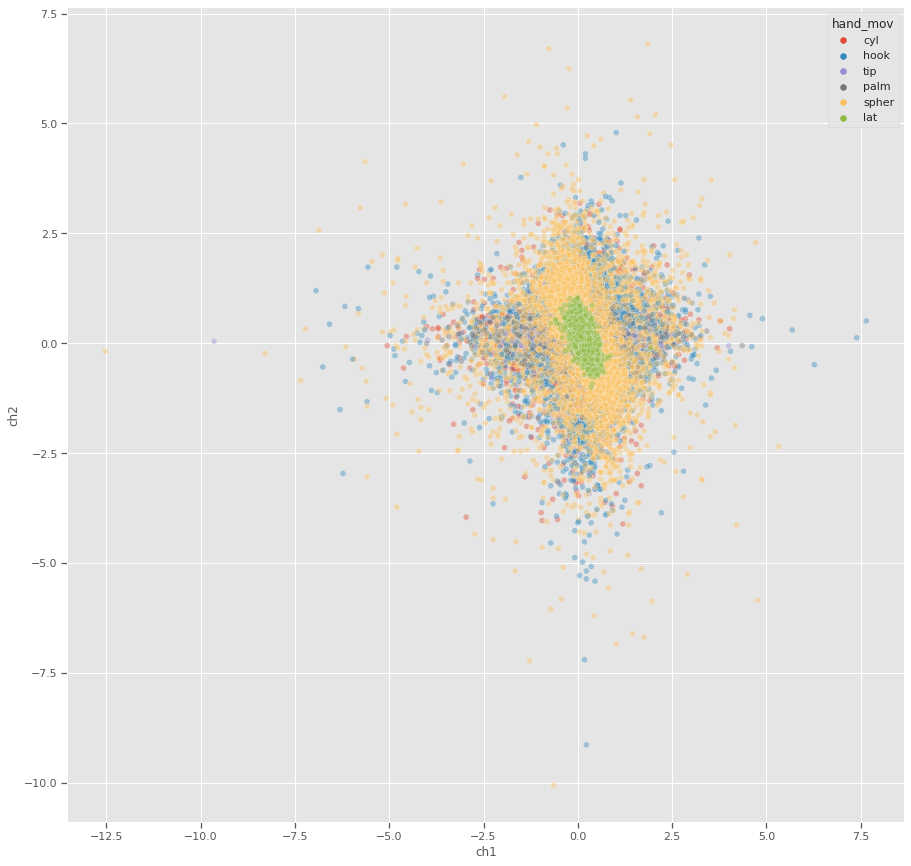

In [15]:

fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x="ch1", y="ch2", hue=df_all['hand_mov'], data=df_all, ax=ax, alpha=0.4)

plt.show()

Com essas visualizações é possível observar que esse problema não é linearmente separável. Um problema linearmente separável se dá quando existe um hiperplano que separa perfeitamente duas classes, assim chamamos as classes linearmente separáveis. Classificadores Lineares funcionam bem no caso de estarmos lidando com um problema linearmente separável, nesse caso precisam de um critério para selecionar entre todos os hiperplanos de decisão que separam perfeitamente os dados de treinamento. 

Se um problema é não linear e seus limites de classe não podem ser bem aproximados com hiperplanos lineares,  o que parece ser o caso do problema em questão, os classificadores não lineares geralmente são mais precisos que os classificadores lineares. Portanto um bom ponto de partida para realizar a classificação nesse problema seria o k-NN.


### Tratamento de outliers



In [16]:
cyl = df_all.loc[df_all['hand_mov'] == 'cyl']
hook = df_all.loc[df_all['hand_mov'] == 'hook']
tip = df_all.loc[df_all['hand_mov'] == 'tip']
palm = df_all.loc[df_all['hand_mov'] == 'palm']
spher = df_all.loc[df_all['hand_mov'] == 'spher']
lat = df_all.loc[df_all['hand_mov'] == 'lat']


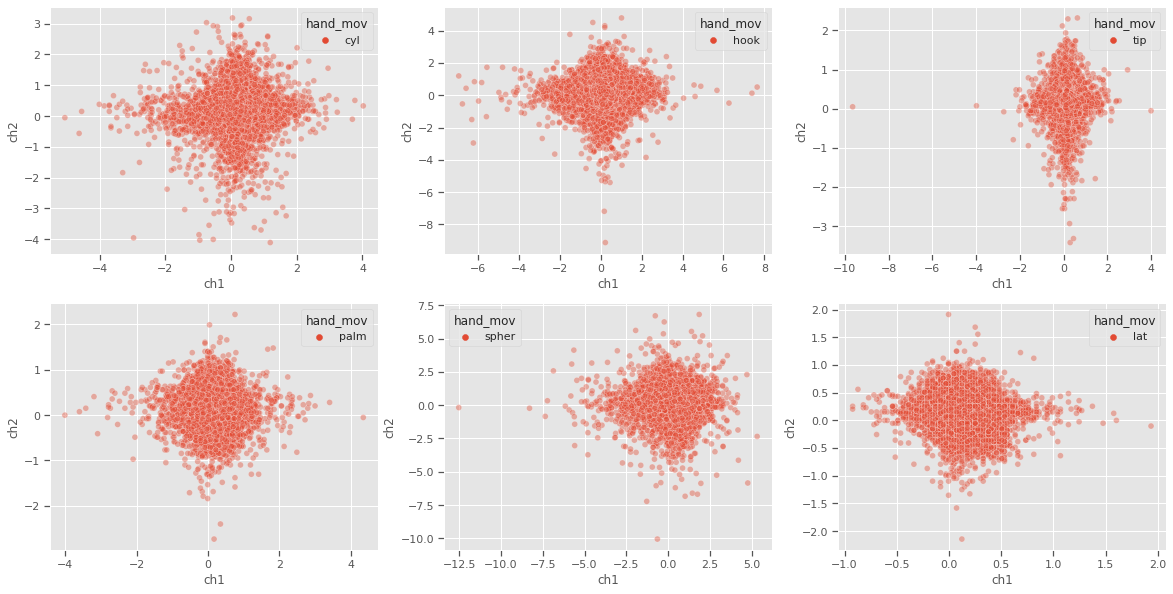

In [17]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

sns.scatterplot(x="ch1", y="ch2", hue=cyl['hand_mov'], data=cyl, ax=ax[0][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=hook['hand_mov'], data=hook, ax=ax[0][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=tip['hand_mov'], data=tip, ax=ax[0][2], alpha=0.4)

sns.scatterplot(x="ch1", y="ch2", hue=palm['hand_mov'], data=palm, ax=ax[1][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=spher['hand_mov'], data=spher, ax=ax[1][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=lat['hand_mov'], data=lat, ax=ax[1][2], alpha=0.4)

plt.show()

Ao observar os gráficos acima podemos notar a existência de alguns pontos bem distantes do conglomerado que compõe majoritariamente cada classe, portanto nesse conjunto de dados temos outliers que podem enviesar o processo de classificação. Para tratar os outliers usaremos o método IsolationForest.

### IsolationForest

É um algoritmo de detecção de anomalias baseado em árvores, baseia-se na modelação dos dados normais de modo a isolar anomalias que são simultaneamente poucas em número e diferentes no espaço de características.

Talvez o hiperparâmetro mais importante no modelo seja o argumento da "contaminação", que é utilizado para ajudar a estimar o número de outliers no conjunto de dados. Este é um valor entre 0,0 e 0,5 e, por padrão, é fixado em 0,1.


In [18]:
from sklearn.ensemble import IsolationForest

def create_X_y_df(df):
  # retrieve the array
  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # summarize the shape of the train and test sets
  return X_train, X_test, y_train, y_test 


X_train, X_test, y_train, y_test = create_X_y_df(df_all)
print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))



Tamanho do X_train antes de remover os outliers: (60300, 3)


### Gráficos do X_train antes de remover os outliers

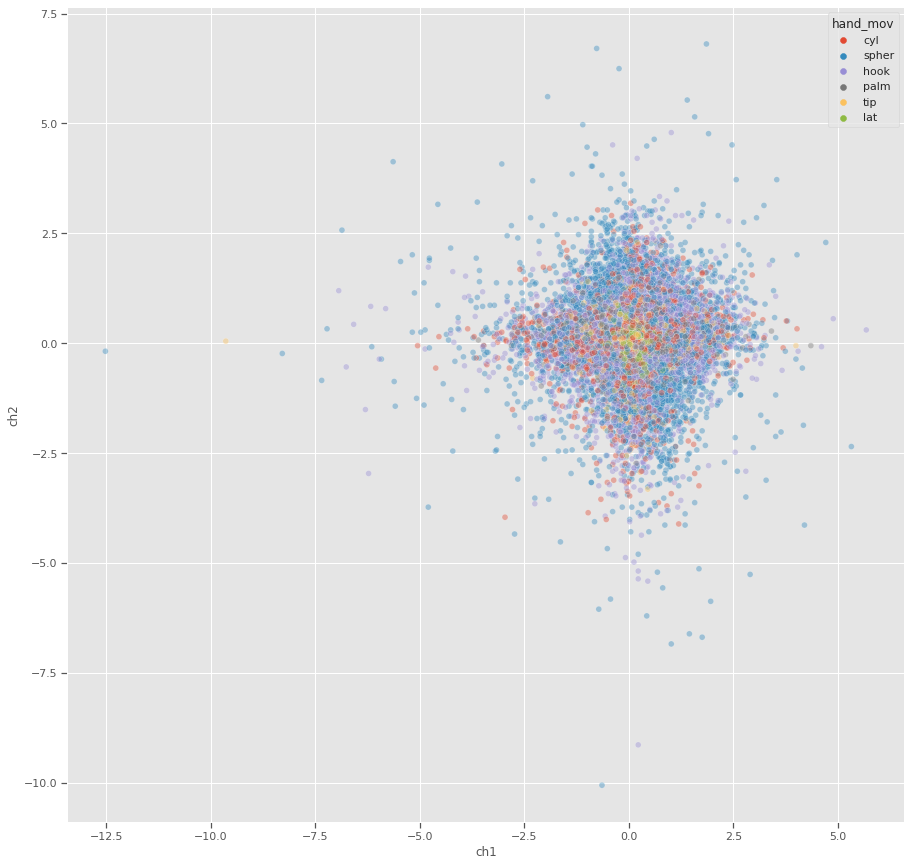

In [19]:
df_train = pd.DataFrame(columns=df_all.columns)

df_train['hand_mov'] = y_train
df_train[['ch1','ch2','gender']] = X_train


fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x="ch1", y="ch2", hue=df_train['hand_mov'], data=df_train, ax=ax, alpha=0.4)

plt.show()

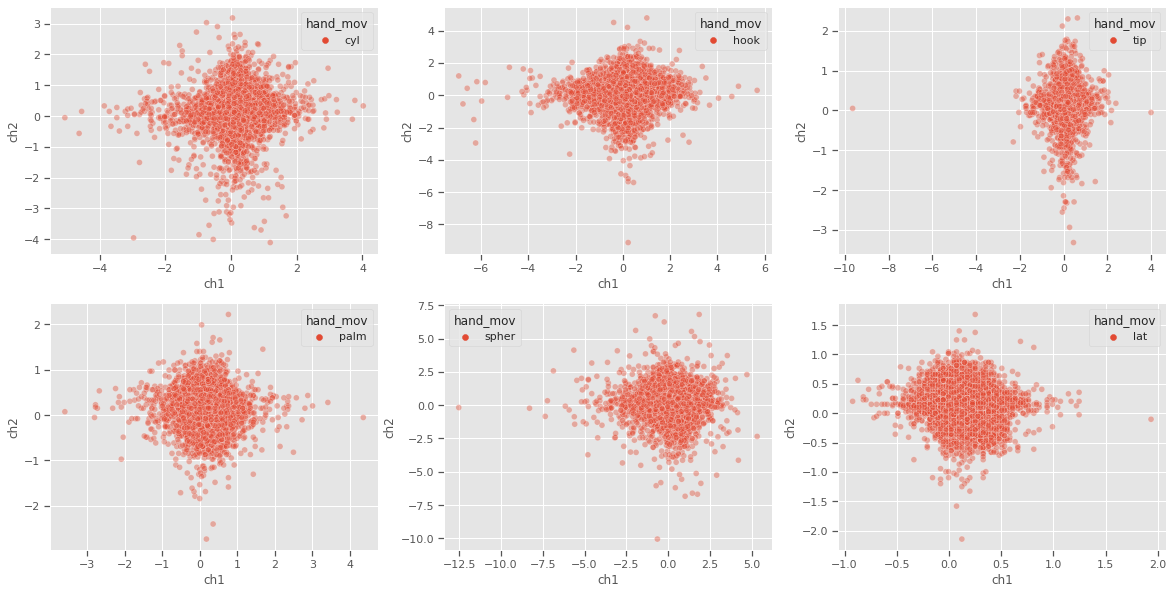

In [20]:
cyl = df_train.loc[df_train['hand_mov'] == 'cyl']
hook = df_train.loc[df_train['hand_mov'] == 'hook']
tip = df_train.loc[df_train['hand_mov'] == 'tip']
palm = df_train.loc[df_train['hand_mov'] == 'palm']
spher = df_train.loc[df_train['hand_mov'] == 'spher']
lat = df_train.loc[df_train['hand_mov'] == 'lat']

fig, ax = plt.subplots(2,3,figsize=(20,10))

sns.scatterplot(x="ch1", y="ch2", hue=cyl['hand_mov'], data=cyl, ax=ax[0][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=hook['hand_mov'], data=hook, ax=ax[0][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=tip['hand_mov'], data=tip, ax=ax[0][2], alpha=0.4)

sns.scatterplot(x="ch1", y="ch2", hue=palm['hand_mov'], data=palm, ax=ax[1][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=spher['hand_mov'], data=spher, ax=ax[1][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=lat['hand_mov'], data=lat, ax=ax[1][2], alpha=0.4)

plt.show()

In [21]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.03)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

Tamanho do X_train após remover os outliers: (58491, 3)


### Gráficos do X_train após remover os outliers

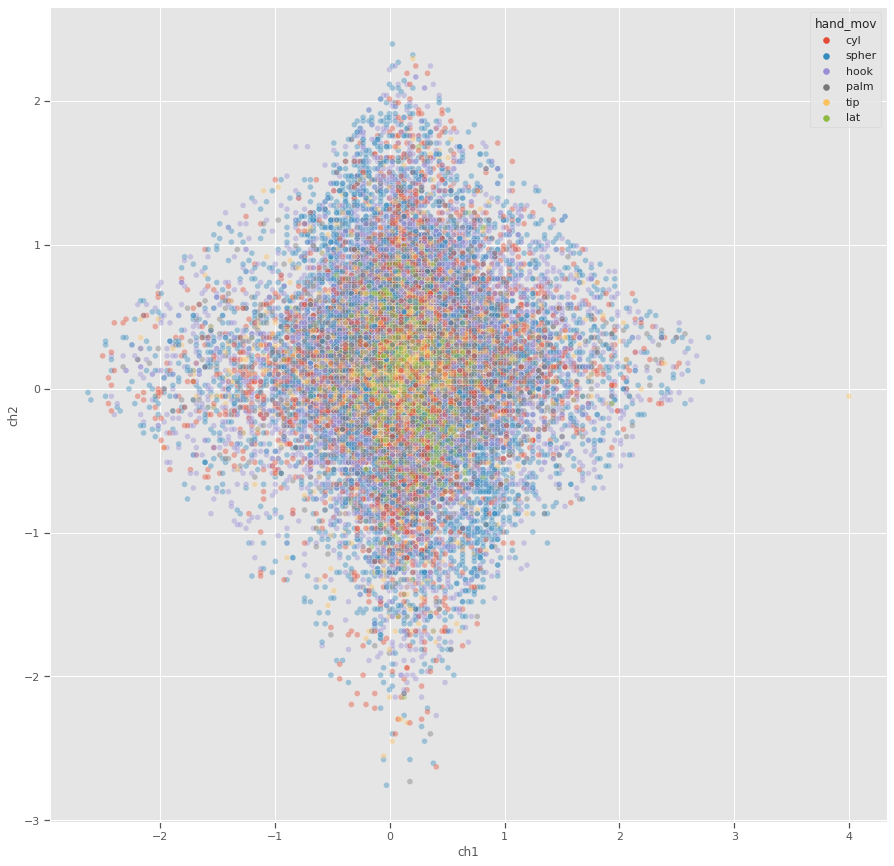

In [22]:

df_train = pd.DataFrame(columns=df_all.columns)

df_train['hand_mov'] = y_train
df_train[['ch1','ch2','gender']] = X_train


fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x="ch1", y="ch2", hue=df_train['hand_mov'], data=df_train, ax=ax, alpha=0.4)

plt.show()

In [23]:
cyl = df_train.loc[df_train['hand_mov'] == 'cyl']
hook = df_train.loc[df_train['hand_mov'] == 'hook']
tip = df_train.loc[df_train['hand_mov'] == 'tip']
palm = df_train.loc[df_train['hand_mov'] == 'palm']
spher = df_train.loc[df_train['hand_mov'] == 'spher']
lat = df_train.loc[df_train['hand_mov'] == 'lat']


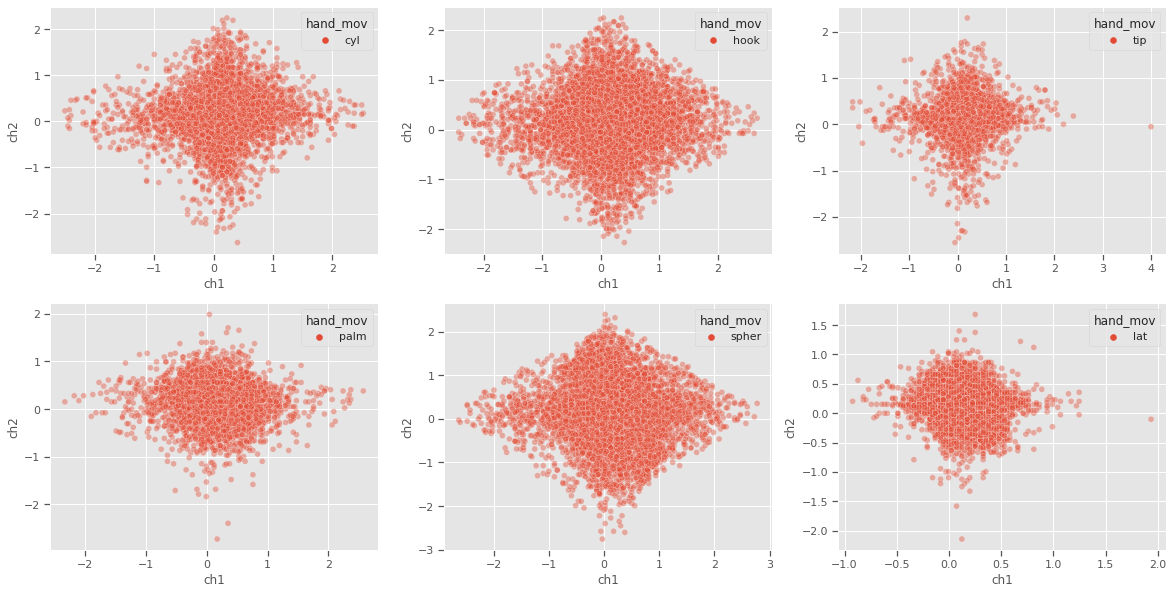

In [24]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

sns.scatterplot(x="ch1", y="ch2", hue=cyl['hand_mov'], data=cyl, ax=ax[0][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=hook['hand_mov'], data=hook, ax=ax[0][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=tip['hand_mov'], data=tip, ax=ax[0][2], alpha=0.4)

sns.scatterplot(x="ch1", y="ch2", hue=palm['hand_mov'], data=palm, ax=ax[1][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=spher['hand_mov'], data=spher, ax=ax[1][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=lat['hand_mov'], data=lat, ax=ax[1][2], alpha=0.4)

plt.show()

Após aplicar o método de detecção de outliers é possível verificar uma diminuição dos "pontos soltos" nos gráficos de dispersão que representam os dados. Apenas poderemos confirmar se a retirada dos outliers melhora o desempenho do modelo ao realizar testes com um modelo baseline e um modelo que possui detecção de outliers.

## Funções Auxiliares

### KFold

In [44]:
def KFolds_outlier(df_all, model):
  outlier_list = []
  normal_list = []

  normal_conf_matrix = []
  outlier_conf_matrix = []

  df = shuffle(df_all)
  data = df.values
  X, y = data[:, :-1], data[:, -1]

  i = 0
  kf = KFold(n_splits=10,random_state=11, shuffle=True)
  kf.get_n_splits(X)

  print(kf)

  for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    i = i + 1
    
  
    print("--------------------------------------------------------")
    print("Fold número: ", i)
    print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print("Acurácia antes retirada de outliers: ", acc)
    normal_list.append(acc)
    normal_conf_matrix.append(conf_matrix)

    # identify outliers in the training dataset
    iso = IsolationForest(contamination=0.03)
    yhat = iso.fit_predict(X_train)
    # select all rows that are not outliers
    mask = yhat != -1
    X_train, y_train = X_train[mask, :], y_train[mask]
    
    print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print("Acurácia após retirada de outliers: ", acc)
    outlier_list.append(acc)
    outlier_conf_matrix.append(conf_matrix)

  return normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix

### GridSearch

In [119]:
def grid_search(model, param_grid, n_folds, X, y):
  #use gridsearch to test all values for n_neighbors
  gscv = GridSearchCV(model, param_grid, cv=n_folds, verbose = 2)
  #fit model to data
  gscv.fit(X, y)
  return gscv.best_params_, gscv.best_score_


### Boxplot

In [27]:
def boxplot_results(normal_list, outlier_list):
  results_kfold = pd.DataFrame()
  results_kfold["mean"] = normal_list
  results_kfold["method"] = "with outliers"

  results_kfold1 = pd.DataFrame()
  results_kfold1["mean"] = outlier_list
  results_kfold1["method"] = "without outliers"

  results_kfold = pd.concat([results_kfold,results_kfold1])
  results_kfold.head()

  fig, ax = plt.subplots(figsize=(12,10)) 
  ax = sns.boxplot(x="method", y="mean", hue="method", data=results_kfold, palette="Set1")
  plt.show()

### Confusion Matrix

In [29]:
def conf_matrix(conf_matrix, list_scores):
  index_best = list_scores.index(max(list_scores))
  conf_matrix_best = conf_matrix[index_best]

  fig, ax = plt.subplots(figsize=(15,10)) 
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(conf_matrix_best, annot=True, annot_kws={"size": 10}) # font size

  plt.show()

### Repeated KFold

In [62]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=11)
	# create model
	model = model
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

def repeated_KFold(model, df_all):
  # create datasetdata = df_all.values
  data = df_all.values
  X, y = data[:, :-1], data[:, -1]
  # configurations to test
  repeats = range(1,10)
  results = list()
  modelo = model

  for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r, modelo)
    # summarize
    print('>%d mean=%.4f std=%.3f' % (r, mean(scores), std(scores)))
    # store
    results.append(scores)
  # plot the results
  pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
  pyplot.show()


  mean_scores = []
  for i in results:
    mean_scores.append(mean(i))
  best_score = np.amax(mean_scores)

  return best_score

### Avaliação modelo

In [109]:
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    acc = accuracy_score(test_labels, y_pred)
    conf_matrix = confusion_matrix(test_labels, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print('Model Performance')
    print('Accuracy = {:0.5f}%.'.format(acc))
    
    return acc, conf_matrix

# Algoritmos de Classificação

In [ ]:
dict_results = {}

## KNN

### Modelo baseline

In [104]:
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['knn_baseline'] = base_accuracy


Modelo baseline
Model Performance
Accuracy = 0.25195%.


### Grid Search para achar melhor n de k

In [30]:

data = df_all.values
X, y = data[:, :-1], data[:, -1]

knn = KNeighborsClassifier()
best_params, best_score = grid_search(knn, {'n_neighbors': np.arange(21, 50, 2)},10, X,y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] n_neighbors=21 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.7s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.7s
[CV] n_neighbors=21 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.6min finished


In [31]:
#check mean score for the top performing value of n_neighbors
best_score

0.2577

In [33]:
#check top performing n_neighbors value
knn_best = best_params
print("Melhores parâmetros: {}".format(knn_best))

Melhores parâmetros: {'n_neighbors': 43}


### K-fold com e sem a retirada de outliers

In [45]:
knn = KNeighborsClassifier(**knn_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, knn)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.287
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.27855555555555556
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.2932222222222222
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.2892222222222222
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.28844444444444445
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.2872222222222222
-------------------------------------------------------

In [46]:
print(max(normal_list))
print(max(outlier_list))

dict_results['knn_kfold'] = max(normal_list)
dict_results['knn_kfold_outlier'] = max(outlier_list)

0.29533333333333334
0.2946666666666667


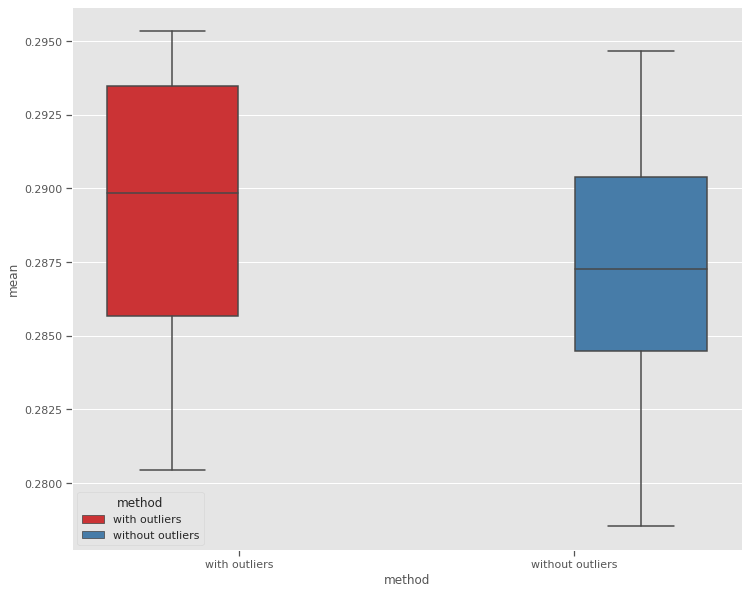

In [47]:
boxplot_results(normal_list, outlier_list)

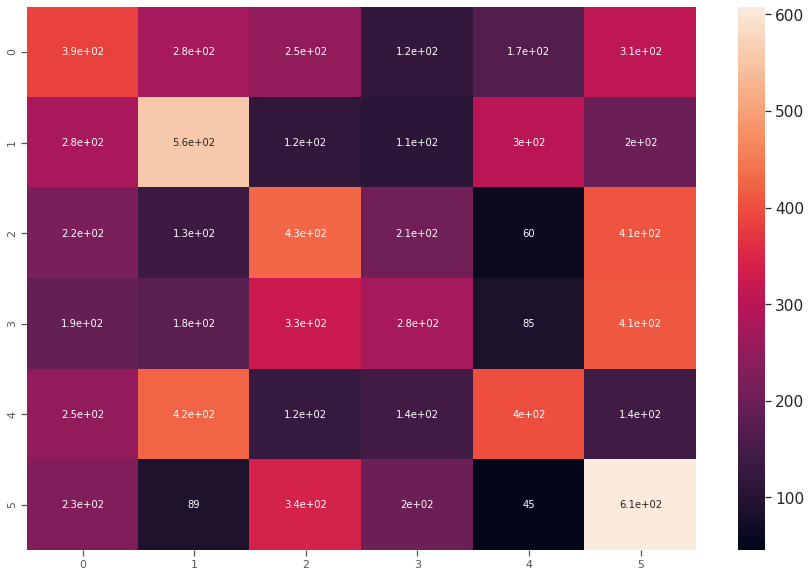

In [48]:
conf_matrix(normal_conf_matrix, normal_list)

### Retirando a coluna "gender"

In [49]:
df_no_gender = df_all.drop(["gender"], axis=1)
data = df_no_gender.values
X, y = data[:, :-1], data[:, -1]

knn = KNeighborsClassifier()
best_params, best_score = grid_search(knn, {'n_neighbors': np.arange(21, 50, 2)},10, X,y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] n_neighbors=21 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_neighbors=21, total=   0.5s
[CV] n_neighbors=21 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................... n_neighbors=21, total=   0.5s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.5s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.5s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.5s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.5s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.6s
[CV] n_neighbors=21 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.4min finished


In [50]:
best_score

0.24539999999999998

In [51]:
knn_nogender_best = best_params
print("Melhores parâmetros: {}".format(knn_nogender_best))

Melhores parâmetros: {'n_neighbors': 43}


In [52]:
knn = KNeighborsClassifier(**knn_nogender_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_no_gender, knn)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 2)
Acurácia antes retirada de outliers:  0.26611111111111113
Tamanho do X_train após remover os outliers: (78570, 2)
Acurácia após retirada de outliers:  0.26744444444444443
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 2)
Acurácia antes retirada de outliers:  0.27566666666666667
Tamanho do X_train após remover os outliers: (78570, 2)
Acurácia após retirada de outliers:  0.2683333333333333
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 2)
Acurácia antes retirada de outliers:  0.26466666666666666
Tamanho do X_train após remover os outliers: (78570, 2)
Acurácia após retirada de outliers:  0.26844444444444443
---------------------------------------

In [53]:
print(max(normal_list))
print(max(outlier_list))

dict_results['knn_kfold_nogender'] = max(normal_list)
dict_results['knn_kfold_outlier_nogender'] = max(outlier_list)

0.279
0.27644444444444444


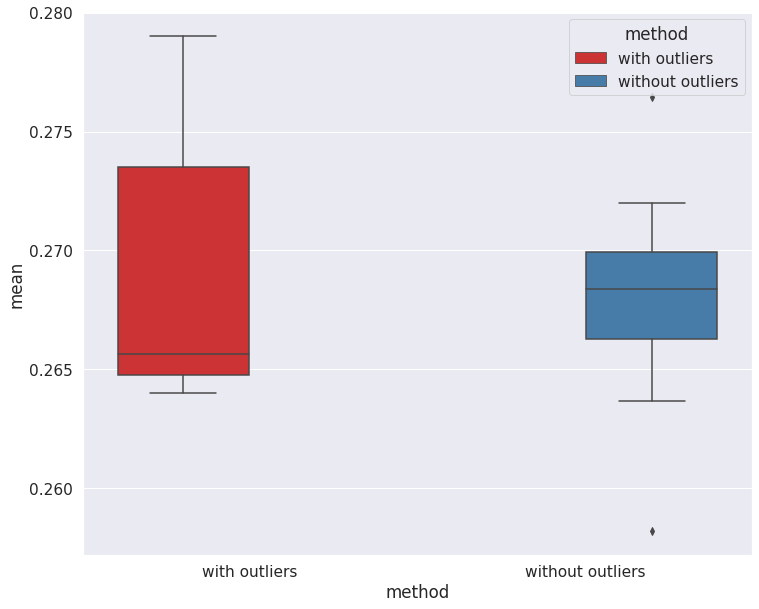

In [54]:
boxplot_results(normal_list, outlier_list)

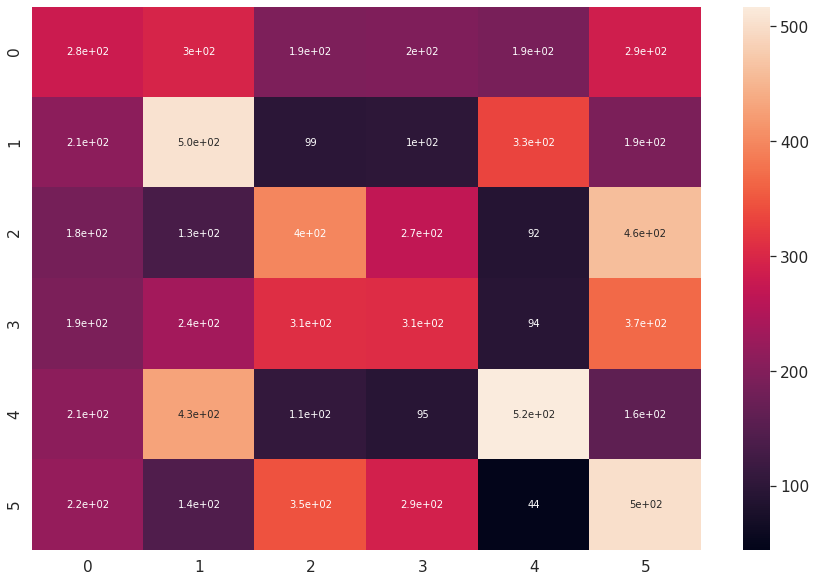

In [55]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-fold 

>1 mean=0.2873 std=0.004
>2 mean=0.2871 std=0.004
>3 mean=0.2872 std=0.004
>4 mean=0.2871 std=0.003
>5 mean=0.2872 std=0.003
>6 mean=0.2874 std=0.004
>7 mean=0.2872 std=0.004
>8 mean=0.2872 std=0.004
>9 mean=0.2870 std=0.004


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


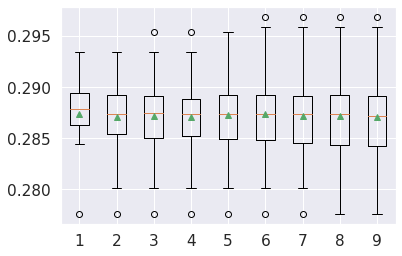

In [65]:
knn = KNeighborsClassifier(**knn_best)
best_score = repeated_KFold(knn, df_all)


In [66]:
best_score

0.28741666666666676

In [ ]:

dict_results['knn_kfold_repeated'] = best_score

## Decision Tree

### Modelo baseline

In [105]:
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['dtree_baseline'] = base_accuracy

Modelo baseline
Model Performance
Accuracy = 0.26354%.


### Grid Search para achar parâmetros

In [67]:
data = df_all.values
X, y = data[:, :-1], data[:, -1]

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree = DecisionTreeClassifier()
best_params, best_score = grid_search(dtree, param_grid, 10, X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... criterion=gini, max_depth=3, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   46.1s finished


In [68]:
print(best_params)
dtree_best = best_params

{'criterion': 'entropy', 'max_depth': 9}


In [69]:
best_score

0.26881111111111117

### K-Fold com e sem a retirada de outliers

In [70]:
dtree = DecisionTreeClassifier(**dtree_best)  
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, dtree)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.29677777777777775
Tamanho do X_train após remover os outliers: (78574, 3)
Acurácia após retirada de outliers:  0.2926666666666667
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.29255555555555557
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.2853333333333333
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.29644444444444445
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.29777777777777775
----------------------------------------

In [71]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['dtree_kfold'] = max(normal_list)
dict_results['dtree_kfold_outlier'] = max(outlier_list)

0.30266666666666664
0.29777777777777775


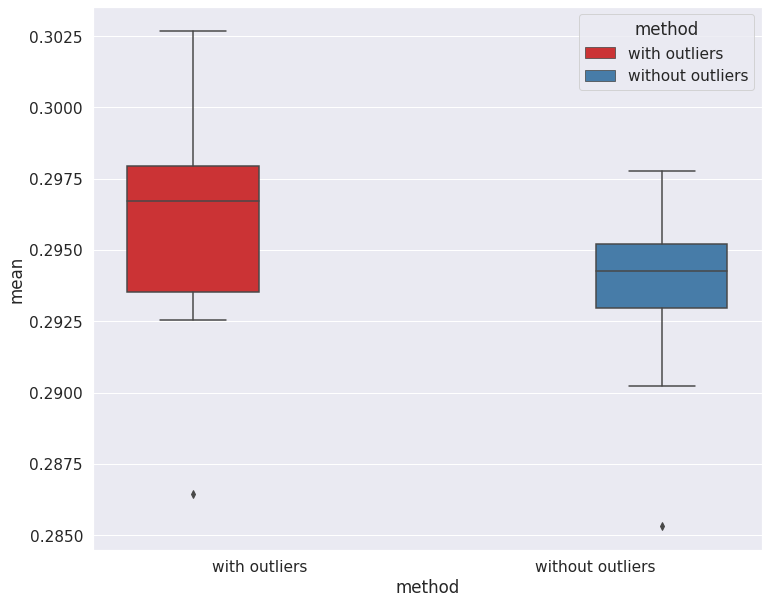

In [72]:
boxplot_results(normal_list, outlier_list)

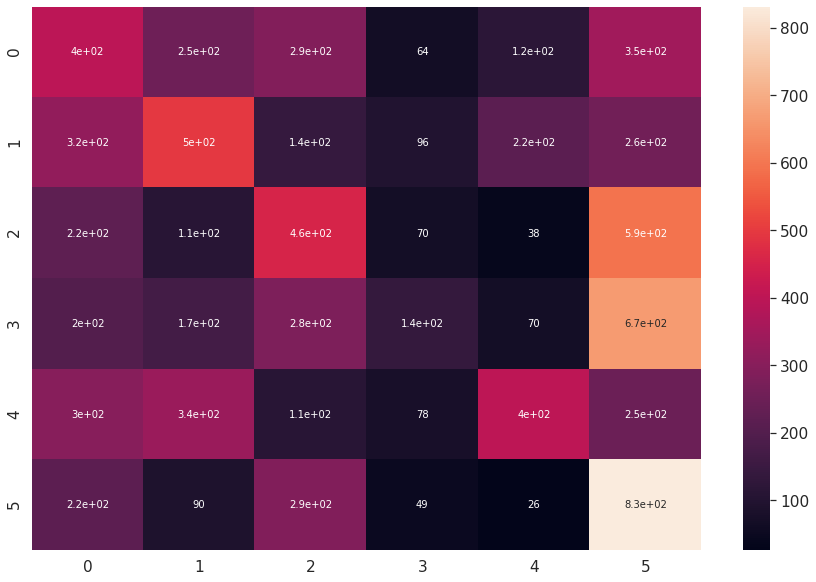

In [73]:
conf_matrix(normal_conf_matrix, normal_list)

### Retirando a coluna "gender"

In [74]:
df_no_gender = df_all.drop("gender", axis=1)
df = shuffle(df_no_gender)
data = df.values
X, y = data[:, :-1], data[:, -1]

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree = DecisionTreeClassifier()
best_params, best_score = grid_search(dtree, param_grid, 10, X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   0.2s
[CV] criterion=gini, max_depth=3 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   50.6s finished


In [75]:
dtree_nogender_best = best_params
print(best_params)

{'criterion': 'entropy', 'max_depth': 9}


In [76]:
best_score

0.2766666666666667

In [77]:
dtree = DecisionTreeClassifier(**dtree_nogender_best)  
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_no_gender, dtree)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.2951111111111111
Tamanho do X_train após remover os outliers: (78572, 3)
Acurácia após retirada de outliers:  0.29655555555555557
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.2892222222222222
Tamanho do X_train após remover os outliers: (78571, 3)
Acurácia após retirada de outliers:  0.28244444444444444
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.29644444444444445
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.29744444444444446
----------------------------------------

In [78]:
print(np.amax(normal_list))
print(np.amax(outlier_list))


dict_results['dtree_kfold_nogender'] = max(normal_list)
dict_results['dtree_kfold_outlier_nogender'] = max(outlier_list)

0.2986666666666667
0.29833333333333334


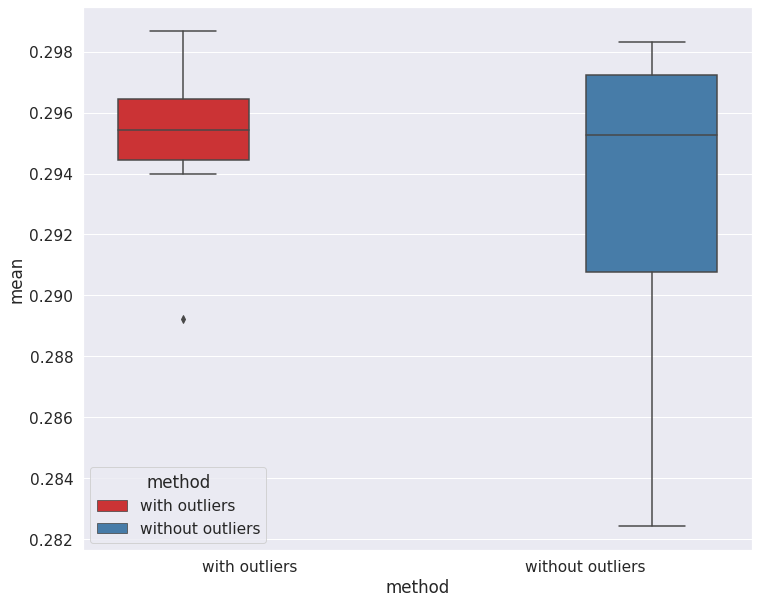

In [79]:
boxplot_results(normal_list, outlier_list)

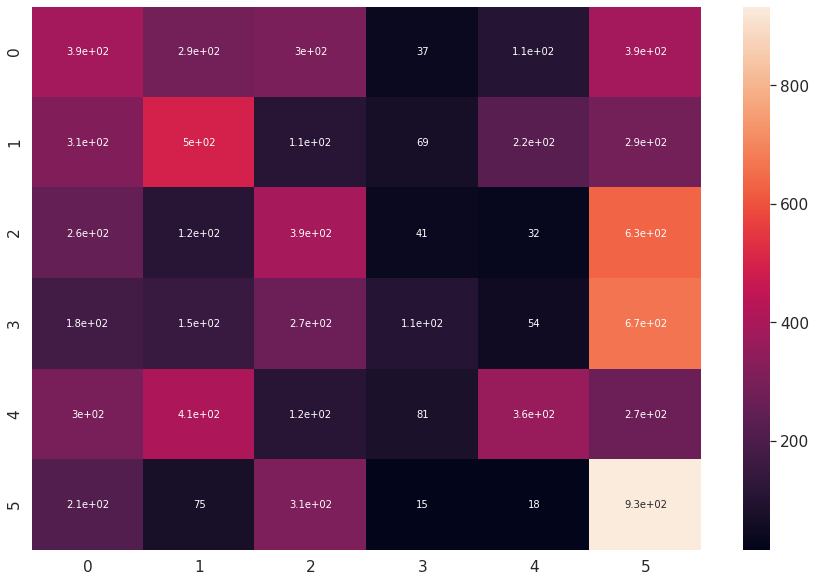

In [80]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-Fold

>1 mean=0.2940 std=0.004
>2 mean=0.2953 std=0.004
>3 mean=0.2958 std=0.004
>4 mean=0.2957 std=0.004
>5 mean=0.2960 std=0.005
>6 mean=0.2959 std=0.005
>7 mean=0.2960 std=0.005
>8 mean=0.2961 std=0.005
>9 mean=0.2960 std=0.005


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


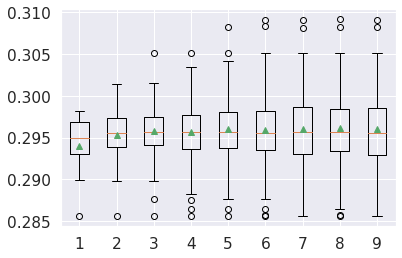

In [81]:
dtree = DecisionTreeClassifier(**dtree_best)
best_score = repeated_KFold(dtree, df_all)

In [82]:
best_score

0.29610277777777777

In [ ]:

dict_results['dtree_kfold_repeated'] = best_score

## Random Forest

### Modelo baseline

In [114]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 11)
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['forest_baseline'] = base_accuracy

Model Performance
Accuracy = 0.26148%.


### Random Search para achar parâmetros

Necessário subsampling para realizar a procura por questões de tempo de processamento

In [84]:
n_estimators = [3, 5, 10, 25]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [5,8,9,10,12]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

data = df_all.sample(15000)
print(data.shape)

X_train, X_test, y_train, y_test = create_X_y_df(data)

print(X_train.shape)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 11)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

(15000, 4)
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.6s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [86]:
rf_random.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 25}

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy, random_conf_matrix = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

### Grid Search para melhorar parâmetros

In [87]:
n_estimators = [5, 10, 25, 50]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [8,9,10]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [88]:
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1909 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.1min finished


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Model Performance
Accuracy = 0.29273%.
Improvement of 11.80556%.


In [89]:
forest_best = grid_search.best_params_

### K-Fold com e sem a retirada de outliers

In [90]:
forest = RandomForestClassifier(**forest_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, forest)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.2981111111111111
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.29744444444444446
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.3005555555555556
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.305
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 3)
Acurácia antes retirada de outliers:  0.3018888888888889
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.3002222222222222
--------------------------------------------------------

In [91]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['forest_kfold'] = np.amax(normal_list)
dict_results['forest_kfold_outlier'] = np.amax(outlier_list)

0.3088888888888889
0.30622222222222223


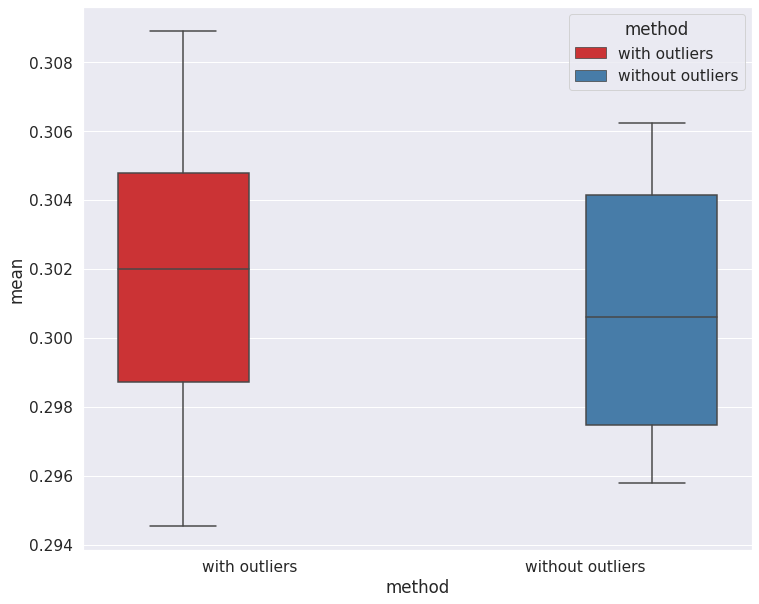

In [92]:
boxplot_results(normal_list, outlier_list)

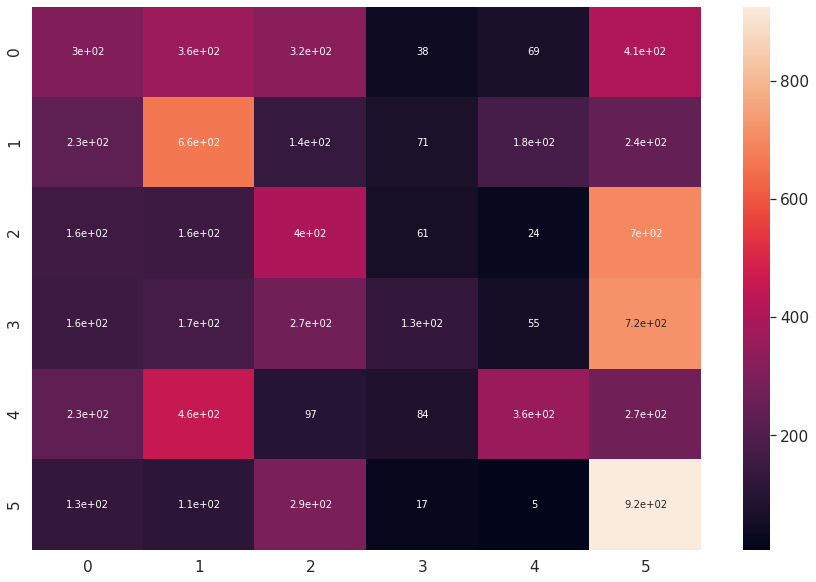

In [93]:
conf_matrix(normal_conf_matrix, normal_list)

### Retirando a coluna "gender"

In [98]:
df_no_gender = df_all.drop("gender", axis=1)

data = df_no_gender.sample(15000)
print(data.shape)

X_train, X_test, y_train, y_test = create_X_y_df(data)

print(X_train.shape)

n_estimators = [5, 10, 25, 50]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [8,9,10]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

(15000, 3)
(10050, 2)


In [99]:
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.2min finished


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Model Performance
Accuracy = 0.27071%.
Improvement of 3.39506%.


In [100]:
forest_nogender_best = grid_search.best_params_

In [101]:
forest = RandomForestClassifier(**forest_nogender_best)  
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_no_gender, forest)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 2)
Acurácia antes retirada de outliers:  0.2907777777777778
Tamanho do X_train após remover os outliers: (78570, 2)
Acurácia após retirada de outliers:  0.2872222222222222
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 2)
Acurácia antes retirada de outliers:  0.286
Tamanho do X_train após remover os outliers: (78570, 2)
Acurácia após retirada de outliers:  0.28144444444444444
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 2)
Acurácia antes retirada de outliers:  0.2868888888888889
Tamanho do X_train após remover os outliers: (78570, 2)
Acurácia após retirada de outliers:  0.2867777777777778
--------------------------------------------------------

In [102]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['forest_kfold_nogender'] = np.amax(normal_list)
dict_results['forest_kfold_outlier_nogender'] = np.amax(outlier_list)

0.2907777777777778
0.2872222222222222


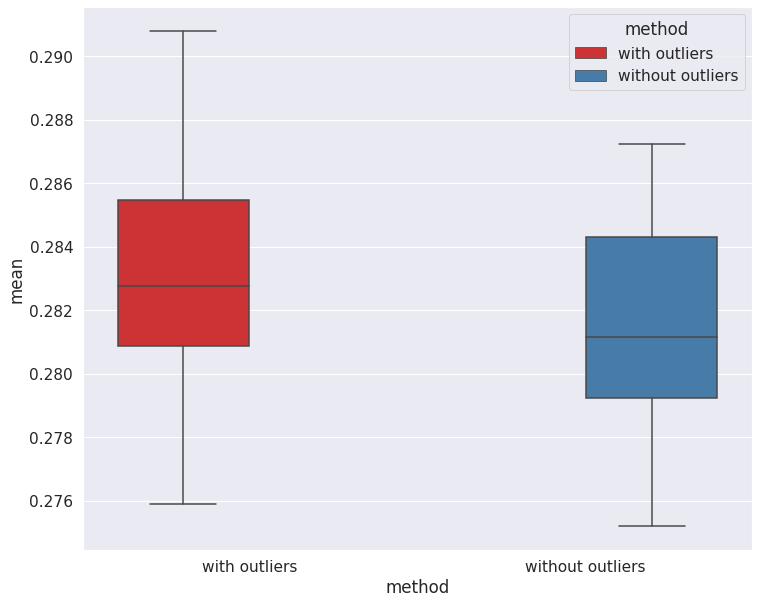

In [106]:
boxplot_results(normal_list, outlier_list)

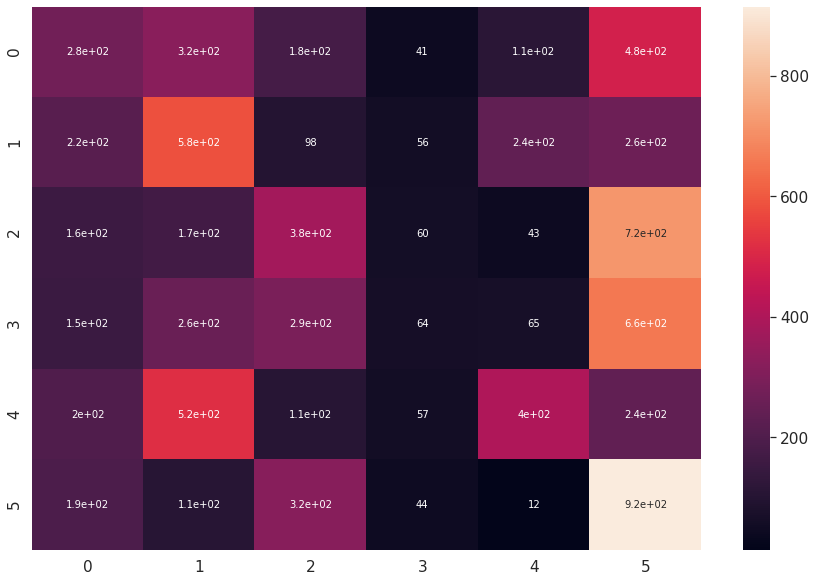

In [107]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-Fold

>1 mean=0.3021 std=0.005
>2 mean=0.3025 std=0.004
>3 mean=0.3024 std=0.004
>4 mean=0.3018 std=0.005
>5 mean=0.3019 std=0.005
>6 mean=0.3019 std=0.005
>7 mean=0.3020 std=0.005
>8 mean=0.3017 std=0.005
>9 mean=0.3022 std=0.005


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


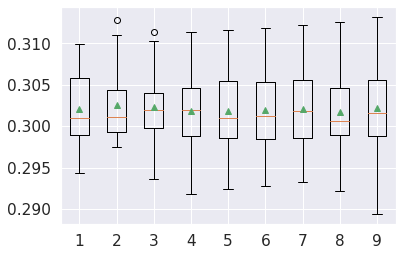

In [108]:
forest = RandomForestClassifier(**forest_best)
best_score = repeated_KFold(forest, df_all)

In [110]:
best_score

0.3025055555555556

In [ ]:
dict_results['forest_kfold_repeated'] = best_score

## MLP

### Modelo baseline

In [113]:
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = MLPClassifier()
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['mlp_baseline'] = base_accuracy

Modelo baseline
Model Performance
Accuracy = 0.30906%.


In [ ]:
def grid_search(model, param_grid, n_folds, X, y):
  #use gridsearch to test all values for n_neighbors
  gscv = GridSearchCV(model, param_grid, cv=n_folds, verbose = 2)
  #fit model to data
  gscv.fit(X, y)
  return gscv.best_params_, gscv.best_score_


### GridSearch para melhorar parâmetros

Necessário subsampling para realizar grid search por motivos de tempo de processamento

In [115]:
data = df_all.sample(12000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

(12000, 4)


In [120]:
#hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

hidden_layer_sizes = [100, 120, 150, 200]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
#max_iter = [400]

param_grid = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'solver': solver}
mlp = MLPClassifier()

best_params, best_score = grid_search(mlp, param_grid,10, X,y)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......
[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......
[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......
[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......
[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......
[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=100, solver=lbfgs .......
[CV]  activation=identity, hidden_layer_sizes=100, solver=lbfgs, total=   0.4s
[CV] activation=ident

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.7s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.9s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  15.3s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.8s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  15.2s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  14.8s
[CV] activation=tanh, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=lbfgs, total=  15.2s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=100, solver=sgd, total=   1.8s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=100, solver=sgd, total=   1.9s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=100, solver=sgd, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=100, solver=sgd, total=   2.2s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=100, solver=sgd, total=   2.0s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=100, solver=sgd, total=   2.0s
[CV] activation=tanh, hidden_layer_sizes=100, solver=sgd ....

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.6s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.6s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.5s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.5s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.7s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.4s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.5s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.6s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.7s
[CV] activation=tanh, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=100, solver=adam, total=  12.5s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.8s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.4s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.5s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.2s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.3s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.3s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  17.6s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  18.1s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  18.0s
[CV] activation=tanh, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=lbfgs, total=  18.0s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=120, solver=sgd, total=   2.0s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=120, solver=sgd, total=   1.9s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=120, solver=sgd, total=   3.0s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=120, solver=sgd, total=   2.1s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=120, solver=sgd, total=   2.2s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=120, solver=sgd, total=   2.3s
[CV] activation=tanh, hidden_layer_sizes=120, solver=sgd ....

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.6s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.6s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.7s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.6s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.6s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=120, solver=adam, total=  14.5s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  21.6s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  22.1s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  21.2s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  20.9s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  21.8s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  20.9s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  21.4s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  21.4s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  22.0s
[CV] activation=tanh, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=lbfgs, total=  21.1s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=150, solver=sgd, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=150, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=150, solver=sgd, total=   2.3s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=150, solver=sgd, total=   2.3s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=150, solver=sgd, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=150, solver=sgd, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=150, solver=sgd ....

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.7s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.8s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.8s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.8s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.8s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.7s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.7s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.9s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.9s
[CV] activation=tanh, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=150, solver=adam, total=  16.6s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  28.2s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.8s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.8s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  28.4s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.5s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.5s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.7s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.5s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.2s
[CV] activation=tanh, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=lbfgs, total=  27.6s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=200, solver=sgd, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=200, solver=sgd, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=200, solver=sgd, total=   3.0s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=200, solver=sgd, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=200, solver=sgd, total=   3.0s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd .............
[CV]  activation=tanh, hidden_layer_sizes=200, solver=sgd, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=200, solver=sgd ....

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  21.8s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  22.1s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  22.0s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  21.9s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  22.0s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  22.0s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  22.1s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  21.7s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  22.0s
[CV] activation=tanh, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=200, solver=adam, total=  21.8s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.2s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.2s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.0s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   5.9s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.2s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.1s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.2s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.2s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.1s
[CV] activation=relu, hidden_layer_sizes=100, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=100, solver=lbfgs, total=   6.1s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.5s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.5s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.5s
[CV] activation=relu, hidden_layer_sizes=100, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=sgd, total=   7.6s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.5s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   7.8s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   5.7s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   7.4s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.4s
[CV] activation=relu, hidden_layer_sizes=100, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=100, solver=adam, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.3s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.4s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=120, solver=lbfgs, total=   7.3s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=sgd, total=   8.2s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   8.1s
[CV] activation=relu, hidden_layer_sizes=120, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=120, solver=adam, total=   9.1s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   8.9s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.1s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.2s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.3s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.1s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.2s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.0s
[CV] activation=relu, hidden_layer_sizes=150, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=150, solver=lbfgs, total=   9.1s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.3s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.5s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.3s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=sgd, total=   9.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.4s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.2s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.3s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.2s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.3s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.2s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.2s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=   7.9s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=   8.7s
[CV] activation=relu, hidden_layer_sizes=150, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=150, solver=adam, total=  10.3s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.8s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.6s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  12.0s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.6s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.7s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=lbfgs ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=relu, hidden_layer_sizes=200, solver=lbfgs, total=  11.8s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.4s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.3s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.6s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.4s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.2s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=sgd .............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=sgd, total=  12.4s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  13.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  13.4s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  12.8s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  12.7s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  10.3s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  12.7s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  12.6s
[CV] activation=relu, hidden_layer_sizes=200, solver=adam ............
[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  12.5s
[CV] activation=relu, hidden_layer_sizes=200, solver=ada

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 48.9min finished


[CV]  activation=relu, hidden_layer_sizes=200, solver=adam, total=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [121]:
best_score

0.30541666666666667

In [122]:
mlp_best = best_params
best_params

{'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}

### K-Fold com e sem a retirada de outliers

In [123]:
mlp = MLPClassifier(**mlp_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, mlp)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.301
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30244444444444446
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.30777777777777776
Tamanho do X_train após remover os outliers: (78571, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30466666666666664
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.30844444444444447
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30444444444444446
--------------------------------------------------------
Fold número:  4
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31033333333333335
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30822222222222223
--------------------------------------------------------
Fold número:  5
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.30333333333333334
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.2991111111111111
--------------------------------------------------------
Fold número:  6
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31355555555555553
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.31
--------------------------------------------------------
Fold número:  7
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.2985555555555556
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.2966666666666667
--------------------------------------------------------
Fold número:  8
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31633333333333336
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.308
--------------------------------------------------------
Fold número:  9
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31555555555555553
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.31566666666666665
--------------------------------------------------------
Fold número:  10
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.3081111111111111
Tamanho do X_train após remover os outliers: (78570, 3)
Acurácia após retirada de outliers:  0.30466666666666664


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [124]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['mlp_kfold'] = np.amax(normal_list)
dict_results['mlp_kfold_outlier'] = np.amax(outlier_list)

0.31633333333333336
0.31566666666666665


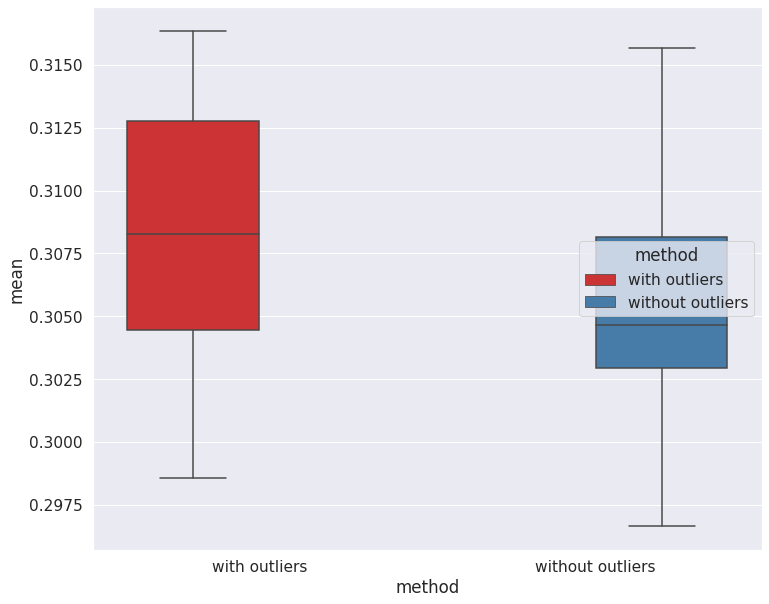

In [125]:
boxplot_results(normal_list, outlier_list)

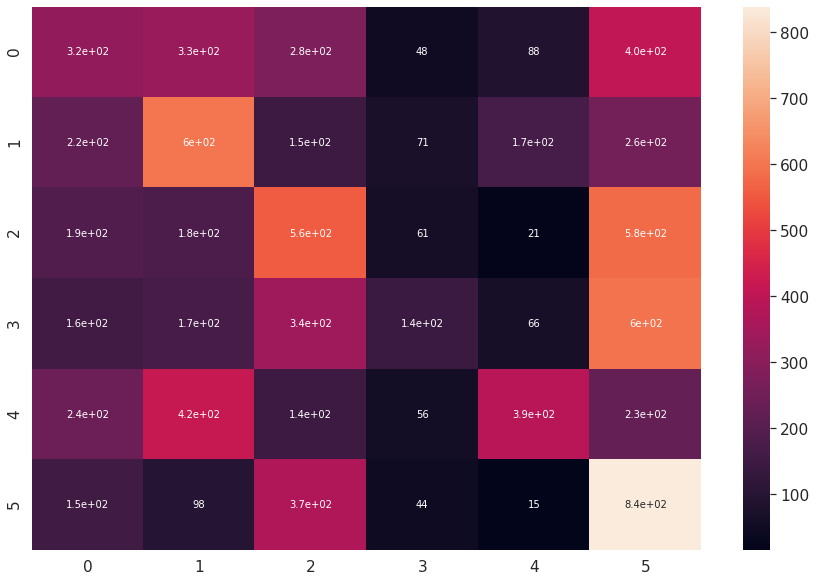

In [126]:
conf_matrix(normal_conf_matrix, normal_list)

### Retirando a coluna "gender"

In [127]:
df_no_gender = df_all.drop("gender", axis=1)

mlp = MLPClassifier(**mlp_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, mlp)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.3058888888888889
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30566666666666664
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.312
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.3128888888888889
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.3075555555555556
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30722222222222223
--------------------------------------------------------
Fold número:  4
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31122222222222223
Tamanho do X_train após remover os outliers: (78571, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.3071111111111111
--------------------------------------------------------
Fold número:  5
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.3021111111111111
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30933333333333335
--------------------------------------------------------
Fold número:  6
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31277777777777777
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30722222222222223
--------------------------------------------------------
Fold número:  7
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.30944444444444447
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30344444444444446
--------------------------------------------------------
Fold número:  8
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.31233333333333335
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.312
--------------------------------------------------------
Fold número:  9
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.2996666666666667
Tamanho do X_train após remover os outliers: (78570, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia após retirada de outliers:  0.30077777777777776
--------------------------------------------------------
Fold número:  10
Tamanho do X_train antes de remover os outliers: (81000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Acurácia antes retirada de outliers:  0.3101111111111111
Tamanho do X_train após remover os outliers: (78571, 3)
Acurácia após retirada de outliers:  0.30777777777777776


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [128]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['mlp_kfold_nogender'] = np.amax(normal_list)
dict_results['mlp_kfold_outlier_nogender'] = np.amax(outlier_list)

0.31277777777777777
0.3128888888888889


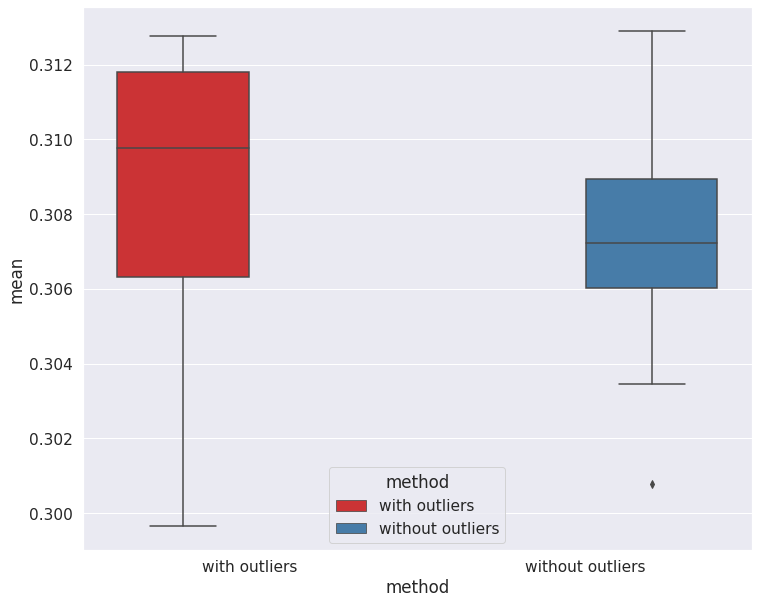

In [129]:
boxplot_results(normal_list, outlier_list)

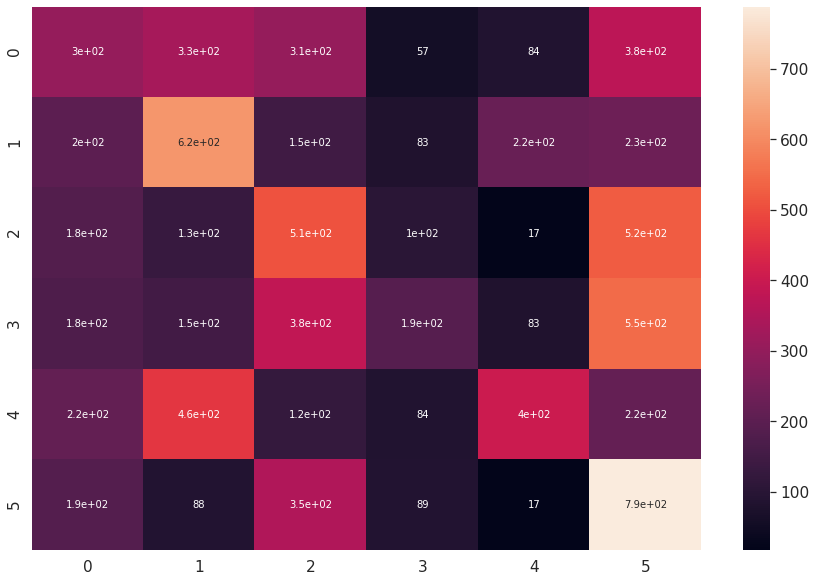

In [130]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-Fold

>1 mean=0.3084 std=0.005
>2 mean=0.3081 std=0.004
>3 mean=0.3086 std=0.004
>4 mean=0.3076 std=0.004
>5 mean=0.3079 std=0.004
>6 mean=0.3083 std=0.005
>7 mean=0.3082 std=0.005
>8 mean=0.3082 std=0.005
>9 mean=0.3077 std=0.004


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


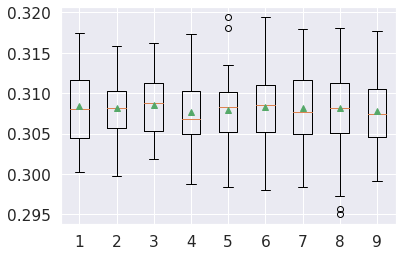

In [131]:
mlp = MLPClassifier(**mlp_best)
best_score = repeated_KFold(mlp, df_all)

In [132]:
best_score

0.3085666666666667

In [134]:
dict_results['mlp_kfold_repeated'] = best_score

## Ensemble: Neural Networks

In [ ]:

import warnings
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot

seed = 11
SEED = 11
np.random.seed(seed)

data = df_all.sample(12000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
  nn = MLPClassifier(hidden_layer_sizes = 120, solver = 'lbfgs', early_stopping=False, random_state=SEED)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('nn', nn))
  level0.append(('nn1', nn1))
  level0.append(('nn2', nn2))
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  nn = MLPClassifier(hidden_layer_sizes = 120, solver = 'lbfgs', early_stopping=False, random_state=SEED)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  models = dict()
  models['mlp-nn'] = nn
  models['mlp-nn1'] = nn1
  models['mlp-nn2'] = nn2
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

(12000, 4)
>mlp-nn 0.303 (0.010)
>mlp-nn1 0.270 (0.011)
>mlp-nn2 0.298 (0.012)


## Ensemble: modelos criados anteriormente




In [ ]:
data = df_all.sample(12000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('mlp-nn', mlp))
  level0.append(('knn', knn))
  level0.append(('dtree', dtree))
  level0.append(('forest', forest))
  
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  models = dict()
  models['mlp-nn'] = mlp
  models['knn'] = knn
  models['dtree'] = dtree
  models['forest'] = forest
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()